## FreeViewing Analysis
### 1. Data Description

In [1]:
import pandas as pd
df = pd.read_csv('../../../../Analysis/Summary/FreeViewing/Data/FreeViewing_Summary_30sec.csv')
print(df.describe())

        Attention          MW      NumFix    AvgFixDur    NumBlink  \
count  960.000000  960.000000  960.000000   960.000000  960.000000   
mean     0.572917    0.427083   58.562500   294.337240   14.836458   
std      0.494912    0.494912   20.009129    97.181563    9.339240   
min      0.000000    0.000000    0.000000     0.000000    0.000000   
25%      0.000000    0.000000   51.000000   240.193713    8.000000   
50%      1.000000    0.000000   63.000000   284.095713   13.000000   
75%      1.000000    1.000000   72.000000   342.726950   20.000000   
max      1.000000    1.000000   95.000000  1083.333333   47.000000   

       ClosedEyeDur   AvgPupDia   VarPupDia  OffStimFram   AvgSacAmp  ...  \
count    960.000000  957.000000  957.000000   960.000000  960.000000  ...   
mean     489.400072    3.625744    0.184662    29.368750    5.903661  ...   
std     1881.966131    0.612144    0.154084    47.123642    1.718801  ...   
min        0.000000    1.736582    0.000000     0.000000    0

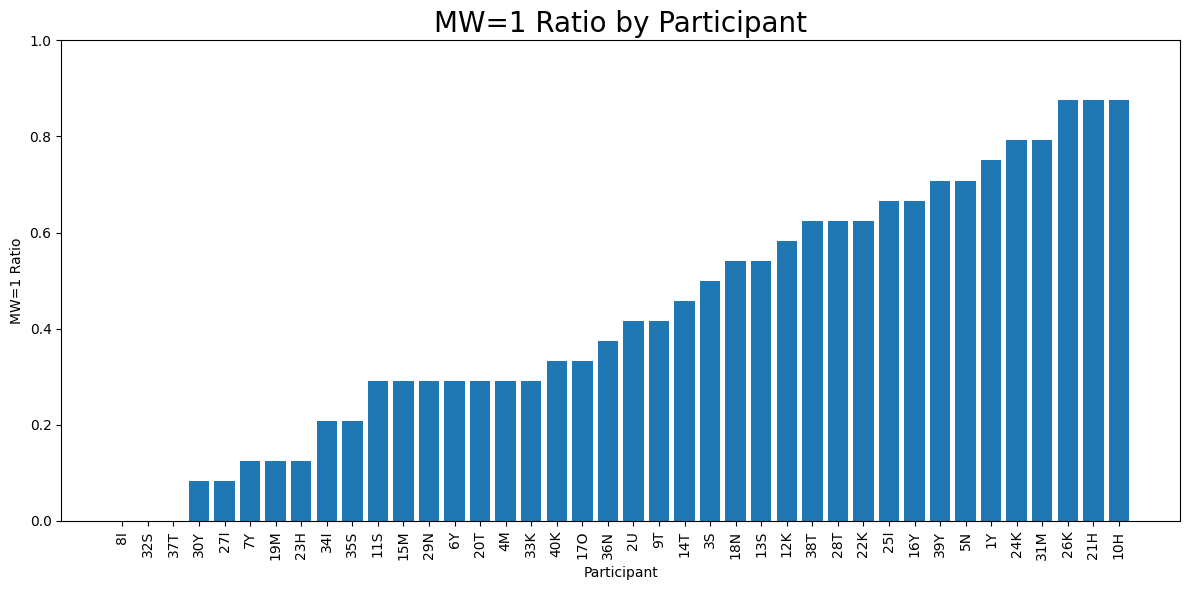

8I     0.000000
32S    0.000000
37T    0.000000
30Y    0.083333
27I    0.083333
7Y     0.125000
19M    0.125000
23H    0.125000
34I    0.208333
35S    0.208333
11S    0.291667
15M    0.291667
29N    0.291667
6Y     0.291667
20T    0.291667
4M     0.291667
33K    0.291667
40K    0.333333
17O    0.333333
36N    0.375000
2U     0.416667
9T     0.416667
14T    0.458333
3S     0.500000
18N    0.541667
13S    0.541667
12K    0.583333
38T    0.625000
28T    0.625000
22K    0.625000
25I    0.666667
16Y    0.666667
39Y    0.708333
5N     0.708333
1Y     0.750000
24K    0.791667
31M    0.791667
26K    0.875000
21H    0.875000
10H    0.875000
dtype: float64
Avg: 0.42708333333333337, Std: 0.2641558478735838, Max: 0.875, Min: 0.0


In [2]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('../../../../Analysis/Summary/FreeViewing/Data/FreeViewing_Summary_30sec.csv')

# Create the MW column
df['MW'] = df['Attention'].apply(lambda x: 1 if x == 0 else 0)

# MW Analysis
# Count the number of times each participant had MW=1
mw_counts = df[df['MW'] == 1]['Participant'].value_counts()

# Include all participants, even those with 0 MW counts
all_participants = df['Participant'].unique()
mw_counts_full = pd.Series(0, index=all_participants)
mw_counts_full.update(mw_counts)

# Count total trials for each participant
total_trials = df['Participant'].value_counts()

# Convert MW counts to percentage
mw_percentage = (mw_counts_full / total_trials)

# Sort the data in ascending order
mw_percentage = mw_percentage.sort_values(ascending=True)

# Calculate statistics
mw_avg_full = mw_percentage.mean()
mw_sd_full = mw_percentage.std()
mw_max_full = mw_percentage.max()
mw_min_full = mw_percentage.min()

# Visualize the results with default color and in ascending order
plt.figure(figsize=(12, 6))
plt.bar(mw_percentage.index, mw_percentage.values)
plt.xlabel('Participant')
plt.ylabel('MW=1 Ratio')
plt.title('MW=1 Ratio by Participant', fontsize=20)
plt.ylim(0, 1)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Print the results
print(mw_percentage, sep='\n')
print(f"Avg: {mw_avg_full}, Std: {mw_sd_full}, Max: {mw_max_full}, Min: {mw_min_full}")

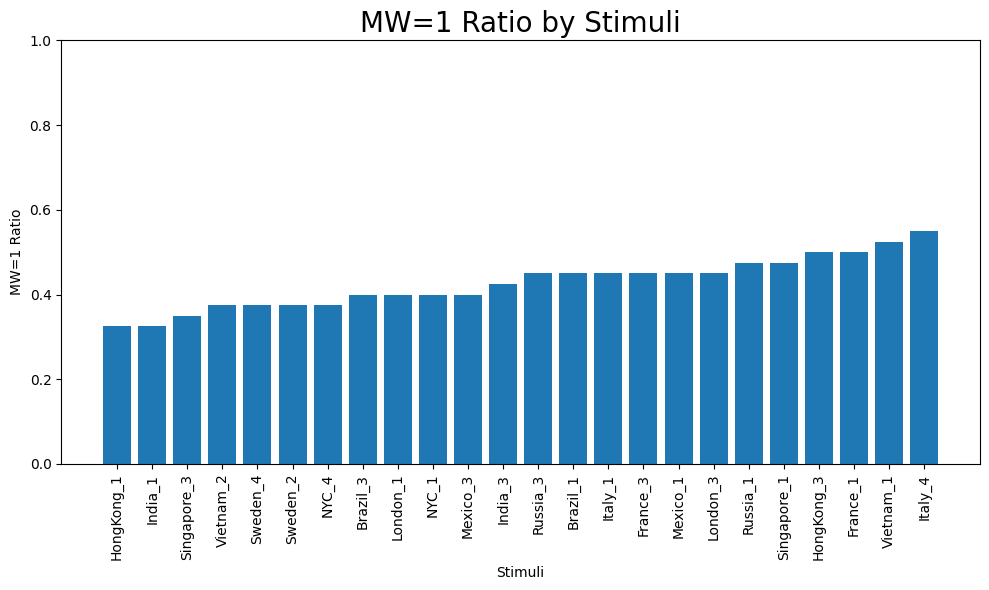

        Stimuli     MW
4    HongKong_1  0.325
6       India_1  0.325
19  Singapore_3  0.350
23    Vietnam_2  0.375
21     Sweden_4  0.375
20     Sweden_2  0.375
15        NYC_4  0.375
1      Brazil_3  0.400
10     London_1  0.400
14        NYC_1  0.400
13     Mexico_3  0.400
7       India_3  0.425
17     Russia_3  0.450
0      Brazil_1  0.450
8       Italy_1  0.450
3      France_3  0.450
12     Mexico_1  0.450
11     London_3  0.450
16     Russia_1  0.475
18  Singapore_1  0.475
5    HongKong_3  0.500
2      France_1  0.500
22    Vietnam_1  0.525
9       Italy_4  0.550
Avg: 0.4270833333333333, Std: 0.06030568267019983


In [3]:
import matplotlib.pyplot as plt
import pandas as pd


df = pd.read_csv('../../../../Analysis/Summary/FreeViewing/Data/FreeViewing_Summary_30sec.csv')

# Create the MW column
df['MW'] = df['Attention'].apply(lambda x: 1 if x == 0 else 0)

# Calculate the percentage of Attention==0 for each Stimuli
mw_percentage = df.groupby('Stimuli')['MW'].apply(lambda x: (x == 1).mean()).reset_index()

# Sort the data for better visualization
mw_percentage = mw_percentage.sort_values(by='MW', ascending=True)

# Calculate mean and standard deviation
mean_attention_0 = mw_percentage['MW'].mean()
std_attention_0 = mw_percentage['MW'].std()

# Plot the bar plot with y-axis from 0 to 1
plt.figure(figsize=(10, 6))
plt.bar(mw_percentage['Stimuli'], mw_percentage['MW'])
plt.xlabel('Stimuli')
plt.ylabel('MW=1 Ratio')
plt.title('MW=1 Ratio by Stimuli', fontsize=20)
plt.ylim(0, 1)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Print the results
print(mw_percentage)
print(f"Avg: {mean_attention_0}, Std: {std_attention_0}")

### Identify the best window size using the RF models

**Global Features only**

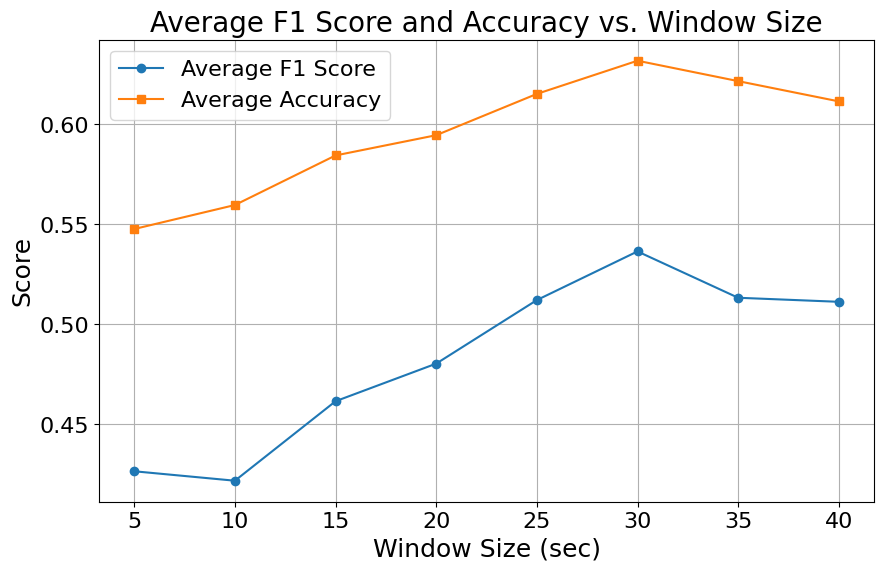

Window size: 5 sec, Average F1 score: 0.427, Average Accuracy: 0.548
Window size: 10 sec, Average F1 score: 0.422, Average Accuracy: 0.560
Window size: 15 sec, Average F1 score: 0.462, Average Accuracy: 0.584
Window size: 20 sec, Average F1 score: 0.480, Average Accuracy: 0.595
Window size: 25 sec, Average F1 score: 0.512, Average Accuracy: 0.615
Window size: 30 sec, Average F1 score: 0.536, Average Accuracy: 0.632
Window size: 35 sec, Average F1 score: 0.513, Average Accuracy: 0.622
Window size: 40 sec, Average F1 score: 0.511, Average Accuracy: 0.611
Best window size (F1 score): 30 sec with average F1 score: 0.536


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import GroupKFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import make_scorer, f1_score, accuracy_score

# Load CSV files into DataFrames
window_sizes = [5 * i for i in range(1, 9)]
dataframes = [pd.read_csv(f"../../../../Analysis/Summary/FreeViewing/Data/FreeViewing_Summary_{w}sec.csv") for w in window_sizes]

# Blacklist of participants with missing data
blacklist = ["22K", "25I", "29N", "39Y", "8I", "32S", "37T"]

global_features = ["NumFix", "AvgFixDur", "NumBlink", "ClosedEyeDur", "AvgPupDia", "VarPupDia", "OffStimFram", "AvgSacAmp", "AvgFixDisp", "LastFixDur"]
time_features = ["NumFix_Sim", "AvgFixDisp_Sim", "AvgFixDur_Sim", "CoveredArea", "det", "revdet", "meanline", "maxline", "ent", "relent", "lam", "tt", "corm", "num_rec", "weighted_num_rec", "num_rec_ratio"]

# Function to prepare data by participant, excluding blacklist
def prepare_data(df):
    df_filtered = df[~df['Participant'].isin(blacklist)]
    X = df_filtered[global_features]
    y = df_filtered['MW']
    groups = df_filtered['Participant']
    return X, y, groups

# Number of iterations and random states
iterations = 10
random_states = range(iterations)

# Loop through each DataFrame and random states
results = {w: {'f1_score': [], 'accuracy': []} for w in window_sizes}
for w, df in zip(window_sizes, dataframes):
    X, y, groups = prepare_data(df)
    # Define the cross-validation strategy
    gkf = GroupKFold(n_splits=5)
    
    # Collect cross-validation scores for each random state
    for random_state in random_states:
        clf = RandomForestClassifier(random_state=random_state)
        f1_scorer = make_scorer(f1_score)
        accuracy_scorer = make_scorer(accuracy_score)
        f1_scores = cross_val_score(clf, X, y, groups=groups, cv=gkf, scoring=f1_scorer)
        accuracy_scores = cross_val_score(clf, X, y, groups=groups, cv=gkf, scoring=accuracy_scorer)
        results[w]['f1_score'].extend(f1_scores)
        results[w]['accuracy'].extend(accuracy_scores)

# Calculate average F1 score and accuracy for each window size
average_results = {w: {'average_f1_score': np.mean(scores['f1_score']), 'average_accuracy': np.mean(scores['accuracy'])} for w, scores in results.items()}

# Convert average_results to a DataFrame for plotting
average_results_df = pd.DataFrame.from_dict(average_results, orient='index').reset_index()
average_results_df.columns = ['window_size', 'average_f1_score', 'average_accuracy']

# Plot using Matplotlib
plt.figure(figsize=(10, 6))
plt.plot(average_results_df['window_size'], average_results_df['average_f1_score'], marker='o', label='Average F1 Score')
plt.plot(average_results_df['window_size'], average_results_df['average_accuracy'], marker='s', label='Average Accuracy')

# Adjust font sizes
plt.xlabel('Window Size (sec)', fontsize=18)
plt.ylabel('Score', fontsize=18)
plt.title('Average F1 Score and Accuracy vs. Window Size', fontsize=20)
plt.legend(fontsize=16)
plt.grid(True)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show()

# Print results
for w, metrics in average_results.items():
    print(f"Window size: {w} sec, Average F1 score: {metrics['average_f1_score']:.3f}, Average Accuracy: {metrics['average_accuracy']:.3f}")

# Find the best window size based on F1 score
best_window_f1 = max(average_results, key=lambda w: average_results[w]['average_f1_score'])
print(f"Best window size (F1 score): {best_window_f1} sec with average F1 score: {average_results[best_window_f1]['average_f1_score']:.3f}")


**Time Features only**

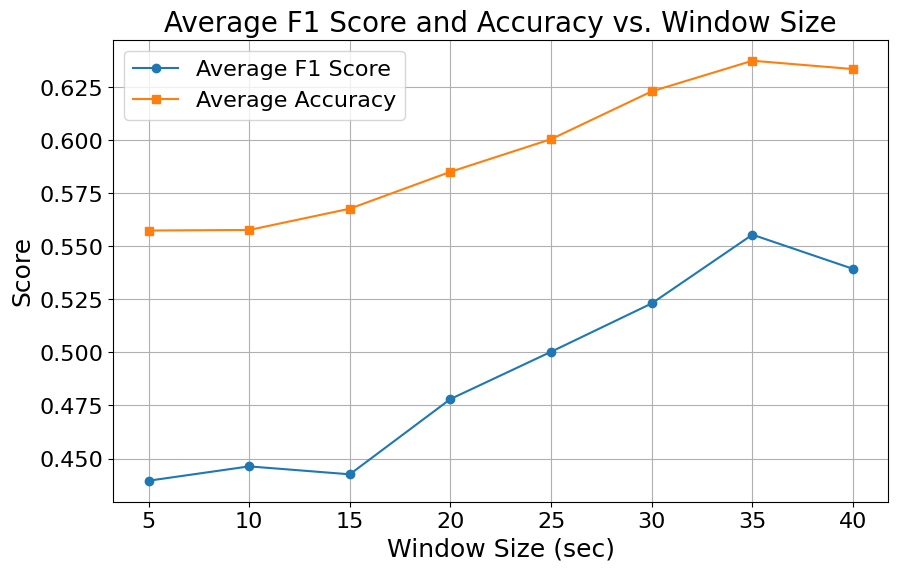

Window size: 5 sec, Average F1 score: 0.440, Average Accuracy: 0.557
Window size: 10 sec, Average F1 score: 0.446, Average Accuracy: 0.558
Window size: 15 sec, Average F1 score: 0.443, Average Accuracy: 0.568
Window size: 20 sec, Average F1 score: 0.478, Average Accuracy: 0.585
Window size: 25 sec, Average F1 score: 0.500, Average Accuracy: 0.601
Window size: 30 sec, Average F1 score: 0.523, Average Accuracy: 0.623
Window size: 35 sec, Average F1 score: 0.556, Average Accuracy: 0.637
Window size: 40 sec, Average F1 score: 0.539, Average Accuracy: 0.634
Best window size (F1 score): 35 sec with average F1 score: 0.556


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import GroupKFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import make_scorer, f1_score, accuracy_score

# Load CSV files into DataFrames
window_sizes = [5 * i for i in range(1, 9)]
dataframes = [pd.read_csv(f"../../../../Analysis/Summary/FreeViewing/Data/FreeViewing_Summary_{w}sec.csv") for w in window_sizes]

# Blacklist of participants with missing data
blacklist = ["22K", "25I", "29N", "39Y", "8I", "32S", "37T"]

global_features = ["NumFix", "AvgFixDur", "NumBlink", "ClosedEyeDur", "AvgPupDia", "VarPupDia", "OffStimFram", "AvgSacAmp", "AvgFixDisp", "LastFixDur"]
time_features = ["NumFix_Sim", "AvgFixDisp_Sim", "AvgFixDur_Sim", "CoveredArea", "det", "revdet", "meanline", "maxline", "ent", "relent", "lam", "tt", "corm", "num_rec", "weighted_num_rec", "num_rec_ratio"]
# Function to prepare data by participant, excluding blacklist
def prepare_data(df):
    df_filtered = df[~df['Participant'].isin(blacklist)]
    X = df_filtered[time_features]
    y = df_filtered['MW']
    groups = df_filtered['Participant']
    return X, y, groups

# Number of iterations and random states
iterations = 10
random_states = range(iterations)

# Loop through each DataFrame and random states
results = {w: {'f1_score': [], 'accuracy': []} for w in window_sizes}
for w, df in zip(window_sizes, dataframes):
    X, y, groups = prepare_data(df)
    # Define the cross-validation strategy
    gkf = GroupKFold(n_splits=5)
    
    # Collect cross-validation scores for each random state
    for random_state in random_states:
        clf = RandomForestClassifier(random_state=random_state)
        f1_scorer = make_scorer(f1_score)
        accuracy_scorer = make_scorer(accuracy_score)
        f1_scores = cross_val_score(clf, X, y, groups=groups, cv=gkf, scoring=f1_scorer)
        accuracy_scores = cross_val_score(clf, X, y, groups=groups, cv=gkf, scoring=accuracy_scorer)
        results[w]['f1_score'].extend(f1_scores)
        results[w]['accuracy'].extend(accuracy_scores)

# Calculate average F1 score and accuracy for each window size
average_results = {w: {'average_f1_score': np.mean(scores['f1_score']), 'average_accuracy': np.mean(scores['accuracy'])} for w, scores in results.items()}

# Convert average_results to a DataFrame for plotting
average_results_df = pd.DataFrame.from_dict(average_results, orient='index').reset_index()
average_results_df.columns = ['window_size', 'average_f1_score', 'average_accuracy']

# Plot using Matplotlib
plt.figure(figsize=(10, 6))
plt.plot(average_results_df['window_size'], average_results_df['average_f1_score'], marker='o', label='Average F1 Score')
plt.plot(average_results_df['window_size'], average_results_df['average_accuracy'], marker='s', label='Average Accuracy')

# Adjust font sizes
plt.xlabel('Window Size (sec)', fontsize=18)
plt.ylabel('Score', fontsize=18)
plt.title('Average F1 Score and Accuracy vs. Window Size', fontsize=20)
plt.legend(fontsize=16)
plt.grid(True)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show()

# Print results
for w, metrics in average_results.items():
    print(f"Window size: {w} sec, Average F1 score: {metrics['average_f1_score']:.3f}, Average Accuracy: {metrics['average_accuracy']:.3f}")

# Find the best window size based on F1 score
best_window_f1 = max(average_results, key=lambda w: average_results[w]['average_f1_score'])
print(f"Best window size (F1 score): {best_window_f1} sec with average F1 score: {average_results[best_window_f1]['average_f1_score']:.3f}")

**All Features**

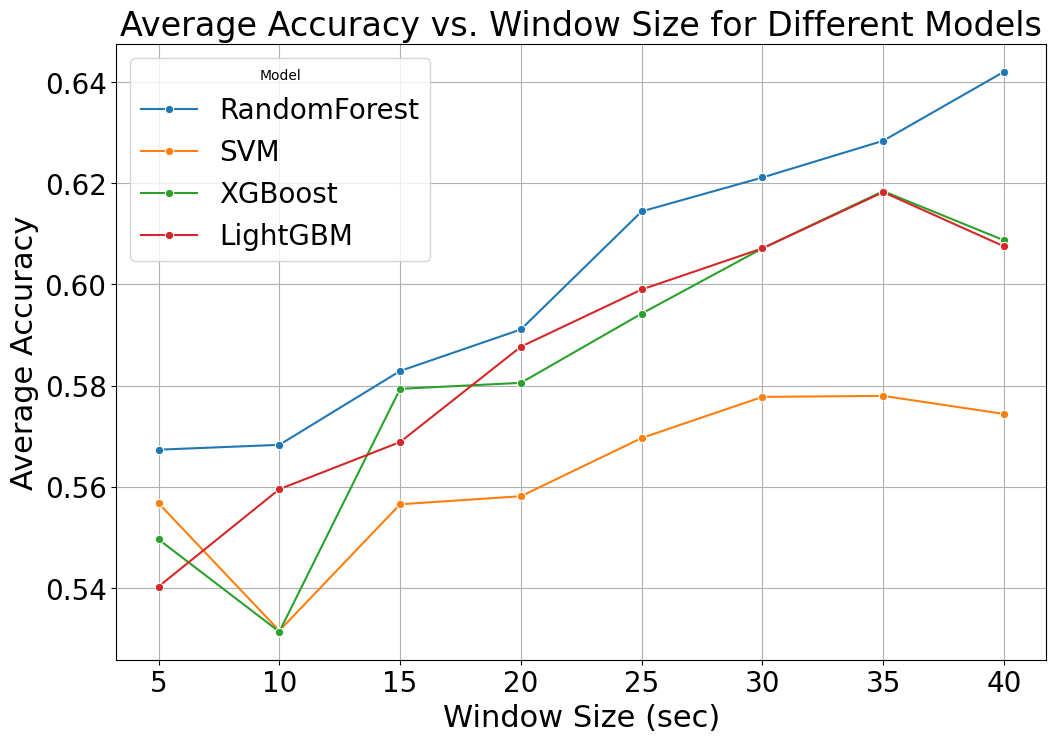

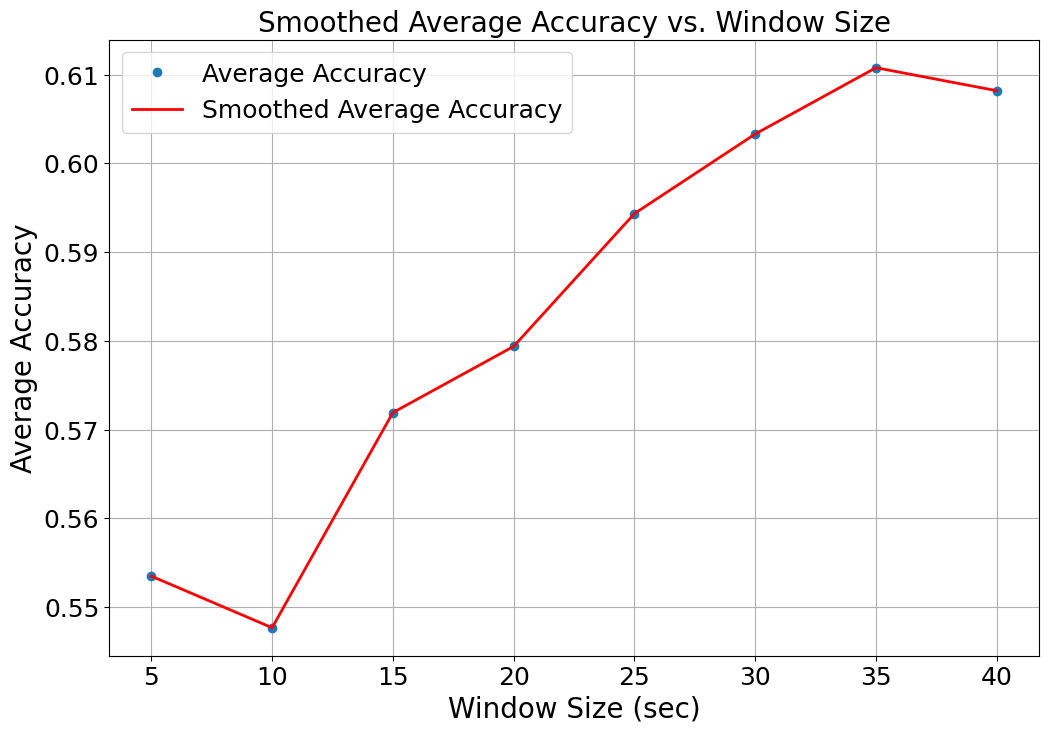

Overall Average Accuracies:
  Window size: 5 sec, Average accuracy: 0.553
  Window size: 10 sec, Average accuracy: 0.548
  Window size: 15 sec, Average accuracy: 0.572
  Window size: 20 sec, Average accuracy: 0.579
  Window size: 25 sec, Average accuracy: 0.594
  Window size: 30 sec, Average accuracy: 0.603
  Window size: 35 sec, Average accuracy: 0.611
  Window size: 40 sec, Average accuracy: 0.608
Best window size based on overall smoothed average accuracy: 35.0 sec


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import GroupKFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import make_scorer, accuracy_score
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from statsmodels.nonparametric.smoothers_lowess import lowess

# Load CSV files into DataFrames
window_sizes = [5 * i for i in range(1, 9)]
dataframes = [pd.read_csv(f"../../../../Analysis/Summary/FreeViewing/Data/FreeViewing_Summary_{w}sec.csv") for w in window_sizes]

global_features = ["NumFix", "AvgFixDur", "NumBlink", "ClosedEyeDur", "AvgPupDia", "VarPupDia", "OffStimFram", "AvgSacAmp", "AvgFixDisp", "LastFixDur"]
time_features = ["NumFix_Sim", "AvgFixDisp_Sim", "AvgFixDur_Sim", "CoveredArea", "det", "revdet", "meanline", "maxline", "ent", "relent", "lam", "tt", "corm", "num_rec", "weighted_num_rec", "num_rec_ratio"]

blacklist = ["22K", "25I", "29N", "39Y", "8I", "32S", "37T"]

# Function to prepare data by participant, excluding blacklist
def prepare_data(df):
    df_filtered = df[~df['Participant'].isin(blacklist)]
    X = df_filtered[global_features + time_features]
    y = df_filtered['MW']
    groups = df_filtered['Participant']
    return X, y, groups

# Number of iterations and random states
iterations = 5
random_states = range(iterations)


# Models to evaluate
models = {
    'RandomForest': RandomForestClassifier,
    'SVM': SVC,
    'XGBoost': XGBClassifier,
    'LightGBM': lambda random_state: LGBMClassifier(random_state=random_state, verbose=-1)  # Suppress LightGBM warnings
}

# Loop through each DataFrame, model, and random state
results = {w: {model: [] for model in models} for w in window_sizes}
for w, df in zip(window_sizes, dataframes):
    X, y, groups = prepare_data(df)
    gkf = GroupKFold(n_splits=5)
    
    for model_name, model in models.items():
        for random_state in random_states:
            pipeline = Pipeline([
                ('imputer', SimpleImputer(strategy='mean')),
                ('classifier', model(random_state=random_state) if model_name not in ['SVM'] else model())
            ])
            accuracy_scores = cross_val_score(pipeline, X, y, groups=groups, cv=gkf, scoring=make_scorer(accuracy_score))
            results[w][model_name].extend(accuracy_scores)

# Calculate average accuracy for each model and window size
average_results = {w: {model: np.mean(scores) for model, scores in models_scores.items()} for w, models_scores in results.items()}

# Convert average_results to a DataFrame for plotting
average_results_df = pd.DataFrame.from_dict(average_results, orient='index').reset_index().melt(id_vars='index')
average_results_df.columns = ['window_size', 'model', 'average_accuracy']

# Plot accuracy changes for all models
plt.figure(figsize=(12, 8))
sns.lineplot(x='window_size', y='average_accuracy', hue='model', data=average_results_df, marker='o')

# Adjust font sizes
plt.xlabel('Window Size (sec)', fontsize=22)
plt.ylabel('Average Accuracy', fontsize=22)
plt.title('Average Accuracy vs. Window Size for Different Models', fontsize=24)
plt.legend(title='Model', fontsize=20)
plt.grid(True)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()

# Calculate overall average accuracy for each window size
overall_average_accuracy = {w: np.mean(list(models_scores.values())) for w, models_scores in average_results.items()}

# Convert overall_average_accuracy to a DataFrame for smoothing and plotting
overall_average_df = pd.DataFrame(list(overall_average_accuracy.items()), columns=['window_size', 'average_accuracy'])

# Smooth the curve using LOWESS
smoothed = lowess(overall_average_df['average_accuracy'], overall_average_df['window_size'], frac=0.3)

# Plot the smoothed curve of overall average accuracy
plt.figure(figsize=(12, 8))
plt.plot(overall_average_df['window_size'], overall_average_df['average_accuracy'], 'o', label='Average Accuracy')
plt.plot(smoothed[:, 0], smoothed[:, 1], color='red', label='Smoothed Average Accuracy', linewidth=2)

# Adjust font sizes
plt.xlabel('Window Size (sec)', fontsize=20)
plt.ylabel('Average Accuracy', fontsize=20)
plt.title('Smoothed Average Accuracy vs. Window Size', fontsize=20)
plt.legend(fontsize=18)
plt.grid(True)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.show()

# Print overall average accuracies
print("Overall Average Accuracies:")
for w, avg_accuracy in overall_average_accuracy.items():
    print(f"  Window size: {w} sec, Average accuracy: {avg_accuracy:.3f}")

# Find the best window size based on smoothed curve
best_window_size = smoothed[np.argmax(smoothed[:, 1]), 0]
print(f"Best window size based on overall smoothed average accuracy: {best_window_size:.1f} sec")
